In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import os
import json
import requests 

This section will make API call and create dataframe with needed data from the Urban Institute of Education Portal accessing the Directory of Common Core of Data from the US Department of Education which is the primary database on public elementary and secondary education. Specifically pulling 2014 directory data for school districts in the state of Florida which based on the api documentation the state code is found under the fips search key at https://educationdata.urban.org/documentation/school-districts.html#overview

In [2]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/directory/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_directory_response = requests.get(query_url)
fl_ccd_directory_data = fl_ccd_directory_response.json()

# Establish the results from the request to loop through below
results_directory = fl_ccd_directory_data['results']

# Create Lists to store values for the columns
district_name = []
dir_nces_id = []
state_id = []
latitude = []
longitude = []
urban_locale = []
agency_type = []
total_schools = []
total_students = []
spec_ed_stud = []
eng_lang_stud = []
teachers_fte = []
instru_aids_fte = []
guidance_cons_fte = []
school_staff_fte = []
district_staff_fte = []
staff_total_fte = []

# Loop through results and store values in appropriate lists
for result in results_directory:
    district_name.append(result['lea_name'])
    dir_nces_id.append(result['leaid'])
    state_id.append(result['state_leaid'])
    latitude.append(result['latitude'])
    longitude.append(result['longitude'])
    urban_locale.append(result['urban_centric_locale'])
    agency_type.append(result['agency_type'])
    total_schools.append(result['number_of_schools'])
    total_students.append(result['enrollment'])
    spec_ed_stud.append(result['spec_ed_students'])
    eng_lang_stud.append(result['english_language_learners'])
    teachers_fte.append(result['teachers_total_fte'])
    instru_aids_fte.append(result['instructional_aides_fte'])
    guidance_cons_fte.append(result['guidance_counselors_total_fte'])
    school_staff_fte.append(result['school_staff_total_fte'])
    district_staff_fte.append(result['lea_staff_total_fte'])
    staff_total_fte.append(result['staff_total_fte'])
    
# Create dataframe from results
fl_ccd_directory = pd.DataFrame({"District Name":district_name, "NCES ID":dir_nces_id, "State ID":state_id,                          
                                 "Degree of urbanization":urban_locale, "Agency Type":agency_type,
                                "Total Schools":total_schools, "Total Students Enrolled":total_students,
                                "Special Ed Students":spec_ed_stud, "English Language Students":eng_lang_stud,
                                "Total FTE Teachers":teachers_fte, "Total FTE Instructional Aids": instru_aids_fte,
                                "Total FTE Guidance Counselors": guidance_cons_fte, "Total FTE School Staff":school_staff_fte,
                                "Total FTE District Staff": district_staff_fte, "Total FTE Staff": staff_total_fte,
                                 "Latitude":latitude, "Longitude":longitude})

# Remove all districts that are not regular local school district
clean_fl_ccd_directory = fl_ccd_directory.loc[fl_ccd_directory['Agency Type'] == 1]


clean_fl_ccd_directory

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,Total FTE Instructional Aids,Total FTE Guidance Counselors,Total FTE School Staff,Total FTE District Staff,Total FTE Staff,Latitude,Longitude
2,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,535,61,None,None,4249,29.652601,-82.318977
3,BAKER,1200060,02,32,1,9,4936,538,11,301,65,10,None,None,604,30.277151,-82.118149
5,BAY,1200090,03,22,1,51,27641,4575,567,1844,732,66,None,None,3735,30.172516,-85.675934
6,BRADFORD,1200120,04,32,1,12,3199,645,6,242,56,8,None,None,507,29.951584,-82.112663
7,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,791,183,None,None,9109,28.248600,-80.736115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,UNION,1201890,63,32,1,9,2384,387,0,175,32,6,None,None,343,30.017477,-82.338341
66,VOLUSIA,1201920,64,21,1,92,61777,9879,3479,4153,593,142,None,None,7586,29.030180,-81.308472
67,WAKULLA,1201950,65,42,1,15,5141,976,8,327,84,9,None,None,708,30.176279,-84.379211
68,WALTON,1201980,66,41,1,23,8435,799,300,569,99,18,None,None,1164,30.720671,-86.098549


In [3]:
# Create a list of district names that were not regular local schools to drop from other tables
drop_agencies = fl_ccd_directory[fl_ccd_directory['Agency Type'] != 1]
drop_ids = drop_agencies['District Name'].tolist()

drop_ids

['FL VIRTUAL',
 'CESA',
 'LAKE WALES CHARTER SCHOOLS',
 'WASH SPECIAL',
 'FAU LAB SCH',
 'FSU LAB SCH',
 'FAMU LAB SCH',
 'UF LAB SCH',
 'DEAF/BLIND']

This section will make API call and create dataframe with needed data from the Urban Institute of Education Portal accessing the Directory of Common Core of Data from the US Department of Education which is the primary database on public elementary and secondary education. Specifically pulling 2014 financal data for school districts in the state of Florida.  Use the same fips code for state above.

In [4]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/finance/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_finance_response = requests.get(query_url)
fl_ccd_finance_data = fl_ccd_finance_response.json()

# Establish the results from the request to loop through below
results_financial = fl_ccd_finance_data['results']

# Create Lists to store values for the columns
fin_nces_id = []
total_rev = []
fed_total_rev = []
st_total_rev = []
loc_total_rev = []
loc_prop_tax_rev = []
total_exp = []
instruct_total = []
intruct_staff_exp = []
general_admin_exp = []
school_admin_exp = []
operation_plant_exp = []
student_transport_exp = []

# Loop through results and store values in appropriate lists
for result in results_financial:
    fin_nces_id.append(result['leaid'])
    total_rev.append(result['rev_total'])
    fed_total_rev.append(result['rev_fed_total'])
    st_total_rev.append(result['rev_state_total'])
    loc_total_rev.append(result['rev_local_total'])
    loc_prop_tax_rev.append(result['rev_local_prop_tax'])
    total_exp.append(result['exp_total'])
    instruct_total.append(result['exp_current_instruction_total'])
    intruct_staff_exp.append(result['exp_current_instruc_staff'])
    general_admin_exp.append(result['exp_current_general_admin'])
    school_admin_exp.append(result['exp_current_sch_admin'])
    operation_plant_exp.append(result['exp_current_operation_plant'])
    student_transport_exp.append(result['exp_current_student_transport'])
    
# Create dataframe from results
fl_ccd_financial = pd.DataFrame({"NCES ID":fin_nces_id, "Total Revenue":total_rev, "Total Federal Revenue":fed_total_rev,                        
                                 "Total State Revenue":st_total_rev, "Total Local Revenue":loc_total_rev,
                                "Local Revenue (Property Tax)":loc_prop_tax_rev, "Total Expense":total_exp,
                                 "Instructional Total":instruct_total, "Total Expense for Instruction Staff":intruct_staff_exp,
                                "Total Expense for General Admin":general_admin_exp, "Total Expense for School Admin":school_admin_exp,
                                "Total Expense for Operations":operation_plant_exp, "Total Expense for Student Transportation":student_transport_exp})

# Remove all districts without financial data
clean_fl_ccd_financial = fl_ccd_financial.loc[fl_ccd_financial['Total Revenue'] > 0]

clean_fl_ccd_financial.head()

,NCES ID,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense,Instructional Total,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
2,1200030,272451000.0,34881000.0,119810000.0,117760000,103083000,269955000,140998000,21763000,3041000,13128000,29535000,11174000
3,1200060,42674000.0,4704000.0,29197000.0,8773000,6266000,44360000,23242000,2595000,732000,2007000,4385000,2613000
5,1200090,268131000.0,26772000.0,103527000.0,137832000,101316000,278559000,149034000,11183000,2045000,13550000,20567000,8132000
6,1200120,31053000.0,4941000.0,17021000.0,9091000,6476000,31823000,17274000,1490000,734000,1792000,3197000,1629000
7,1200150,673236000.0,76493000.0,320008000.0,276735000,221801000,652911000,371080000,49626000,5282000,36220000,55676000,17750000


This section will make API call and create dataframe from the Urban Institute of Education Portal accessing The US Census Bureau's Small Area Income and Poverty Estimates.  Specifically pulling 2014 estimated poverity data for school aged children fo school districts in the state of Florida.  Use the same fips paramaters as above.

In [5]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/saipe/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_saipe_poverty_response = requests.get(query_url)
fl_saipe_poverty_data = fl_saipe_poverty_response.json()

# Establish the results from the request to loop through below
results_poverity = fl_saipe_poverty_data['results']

# Create Lists to store values for the columns
pov_nces_id = []
est_pop_total = []
est_pop_5to17 = []
est_pop_5to17_perc = []
est_pop_5to17_poverity = []
est_pop_5to17_poverity_perc = []


# Loop through results and store values in appropriate lists
for result in results_poverity:
    pov_nces_id.append(result['leaid'])
    est_pop_total.append(result['est_population_total'])
    est_pop_5to17.append(result['est_population_5_17'])
    est_pop_5to17_perc.append(result['est_population_5_17_pct'])
    est_pop_5to17_poverity.append(result['est_population_5_17_poverty'])
    est_pop_5to17_poverity_perc.append(result['est_population_5_17_poverty_pct'])

    
# Create dataframe from results
fl_saipe_poverity = pd.DataFrame({"NCES ID":pov_nces_id, "Estimated Total Population":est_pop_total, 
                                 "Estimated Total Population Ages 5–17":est_pop_5to17,                        
                                 "Share of Population that are school ages 5–17":est_pop_5to17_perc, 
                                 "Estimated Population Ages 5–17 in poverity":est_pop_5to17_poverity,
                                "Share of School-Age Population (5–17) in poverity":est_pop_5to17_poverity_perc})

fl_saipe_poverity.head()

,NCES ID,Estimated Total Population,Estimated Total Population Ages 5–17,Share of Population that are school ages 5–17,Estimated Population Ages 5–17 in poverity,Share of School-Age Population (5–17) in poverity
0,1200030,256380.0,32012.0,0.124862,6438.0,0.201112
1,1200060,27093.0,5004.0,0.184697,1146.0,0.229017
2,1200090,178985.0,27626.0,0.154348,5939.0,0.214979
3,1200120,26702.0,3847.0,0.144072,1047.0,0.272160
4,1200150,556885.0,78183.0,0.140393,15431.0,0.197370


In [6]:
# Combined all above API calls in to one dataframe to match with District Name

dem_pov_nces_combined = pd.merge(clean_fl_ccd_directory,fl_saipe_poverity, on="NCES ID")
fl_nces_combined = pd.merge(dem_pov_nces_combined,clean_fl_ccd_financial, on="NCES ID")
fl_nces_combined.head()

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,...,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense,Instructional Total,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
0,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,...,119810000.0,117760000,103083000,269955000,140998000,21763000,3041000,13128000,29535000,11174000
1,BAKER,1200060,02,32,1,9,4936,538,11,301,...,29197000.0,8773000,6266000,44360000,23242000,2595000,732000,2007000,4385000,2613000
2,BAY,1200090,03,22,1,51,27641,4575,567,1844,...,103527000.0,137832000,101316000,278559000,149034000,11183000,2045000,13550000,20567000,8132000
3,BRADFORD,1200120,04,32,1,12,3199,645,6,242,...,17021000.0,9091000,6476000,31823000,17274000,1490000,734000,1792000,3197000,1629000
4,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,...,320008000.0,276735000,221801000,652911000,371080000,49626000,5282000,36220000,55676000,17750000


This section will read in the excel files from the Florida Department of Education for 2014 and clean the dataframes with only the needed information.

In [7]:
# Read in Florida District Dropout Data
fl_2014_dropout_path = "fldoe_data/2014_FL_dropout_rates.xls"
fl_2014_dropout_data = pd.read_excel(os.path.join(fl_2014_dropout_path),header=4)

# Remove all district names that were dropped due to not local school district and state total
clean_fl_2014_dropout=fl_2014_dropout_data[~fl_2014_dropout_data["District Name"].isin(drop_ids)]
clean_fl_2014_dropout = clean_fl_2014_dropout.loc[clean_fl_2014_dropout['District Name'] != "FLORIDA"]

clean_fl_2014_dropout.head()

,Dist #,District Name,White Dropouts (numerator),White Enrollment (denominator),White Dropout Rate,Black Dropouts (numerator),Black Enrollment (denominator),Black Dropout Rate,Hispanic Dropouts (numerator),Hispanic Enrollment (denominator),...,Pacific Islander Dropout Rate,American Indian Dropouts (numerator),American Indian Enrollment (denominator),American Indian Dropout Rate,Two or More Races Dropouts (numerator),Two or More Races Enrollment (denominator),Two or More Races Dropout Rate,Total Dropouts (numerator),Total Enrollment (denominator),Total Dropout Rate
1,1,ALACHUA,58,4418,0.0131281,174,3115,0.055859,17,803,...,*,1,20,0.05,14,419,0.0334129,265,9182,0.028861
2,2,BAKER,13,1131,0.0114943,0,151,0.000000,0,24,...,*,*,*,*,0,26,0,13,1344,0.009673
3,3,BAY,65,5713,0.0113776,16,1255,0.012749,8,461,...,*,0,34,0,4,359,0.0111421,95,8033,0.011826
4,4,BRADFORD,2,686,0.00291545,4,210,0.019048,0,24,...,*,*,*,*,0,24,0,6,955,0.006283
5,5,BREVARD,101,14766,0.00684004,48,3130,0.015335,26,3138,...,0,0,55,0,15,1441,0.0104094,191,23071,0.008279


# Finding the Mean, Median, and outliers for Dropout Rate

In [8]:
florida_dropout_rate = clean_fl_2014_dropout[["District Name", "Total Dropout Rate"]]
florida_dropout_rate.head()

,District Name,Total Dropout Rate
1,ALACHUA,0.028861
2,BAKER,0.009673
3,BAY,0.011826
4,BRADFORD,0.006283
5,BREVARD,0.008279


In [9]:
florida_dropout_rate.describe()

,Total Dropout Rate
count,67.000000
mean,0.016037
std,0.011796
min,0.000000
25%,0.007894
50%,0.011628
75%,0.022702
max,0.057082


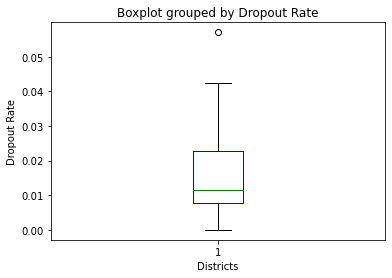

In [10]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
quartiles = florida_dropout_rate["Total Dropout Rate"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest with Matplotlib
plt.boxplot(florida_dropout_rate["Total Dropout Rate"], patch_artist=False,
                medianprops=dict(color="g"),boxprops=dict(color="b"))
plt.title("Boxplot grouped by Dropout Rate")
plt.ylabel('Dropout Rate')
plt.xlabel('Districts')
plt.show()

outliers = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] < lower_bound) | 
                                      (florida_dropout_rate["Total Dropout Rate"] > upper_bound)]


In [17]:
# Create a clean DataFrame by dropping the outlier.
clean_dropout_rate = florida_dropout_rate.loc[florida_dropout_rate["District Name"]!= "DESOTO"]
districts = clean_dropout_rate["District Name"]
clean_dropout_rate.head()

,District Name,Total Dropout Rate
1,ALACHUA,0.028861
2,BAKER,0.009673
3,BAY,0.011826
4,BRADFORD,0.006283
5,BREVARD,0.008279


# Financial Analysis

In [62]:
# Pulling all financial data for districts for analysis
fl_district_financials = pd.merge(clean_dropout_rate,fl_nces_combined, on="District Name")
districts_financials = fl_district_financials[fl_district_financials["District Name"].isin(districts)]
districts_financials

# create a list of our conditions
conditions = [
    (districts_financials["Total Schools"] <= 15),
    (districts_financials["Total Schools"] > 15) & (districts_financials["Total Schools"] < 60),
    (districts_financials["Total Schools"] >= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Small <15', 'Medium 16-59', 'Large >60']

# create a new column and use np.select to assign values to it using our lists as arguments
districts_financials['District Size by # schools'] = np.select(conditions, values)
districts_financials.head()

,District Name,Total Dropout Rate,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,...,Total Local Revenue,Local Revenue (Property Tax),Total Expense,Instructional Total,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation,District Size by # schools
0,ALACHUA,0.028861,1200030,01,12,1,73,28689,3788,584,...,117760000,103083000,269955000,140998000,21763000,3041000,13128000,29535000,11174000,Large >60
1,BAKER,0.009673,1200060,02,32,1,9,4936,538,11,...,8773000,6266000,44360000,23242000,2595000,732000,2007000,4385000,2613000,Small <15
2,BAY,0.011826,1200090,03,22,1,51,27641,4575,567,...,137832000,101316000,278559000,149034000,11183000,2045000,13550000,20567000,8132000,Medium 16-59
3,BRADFORD,0.006283,1200120,04,32,1,12,3199,645,6,...,9091000,6476000,31823000,17274000,1490000,734000,1792000,3197000,1629000,Small <15
4,BREVARD,0.008279,1200150,05,21,1,129,72285,11931,2344,...,276735000,221801000,652911000,371080000,49626000,5282000,36220000,55676000,17750000,Large >60


# Determining the Districts for Analysis

In [63]:
# Establish an even distribution of districts based on number of schools
low = districts_financials.loc[(districts_financials["Total Schools"] <= 15)]
medium = districts_financials.loc[(districts_financials["Total Schools"] > 15) & (districts_financials["Total Schools"] < 60)]
high = districts_financials.loc[districts_financials["Total Schools"] >= 60]
print(f'Smaller Districts = {low["District Name"].count()}, Medium Districts = {medium["District Name"].count()}, Large Districts = {high["District Name"].count()}')

Smaller Districts = 21, Medium Districts = 23, Large Districts = 22


In [20]:
districts_financials.describe()

,Total Dropout Rate,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,Total FTE Instructional Aids,Total FTE Guidance Counselors,...,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense,Instructional Total,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
count,66.000000,66.000000,66.0,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01
mean,0.015415,28.575758,1.0,67.909091,41498.393939,5448.378788,3813.393939,2694.863636,470.045455,85.424242,...,1.611517e+08,1.996909e+08,1.628534e+08,4.125318e+08,2.258507e+08,2.370765e+07,3.315136e+06,2.033950e+07,3.653926e+07,1.425024e+07
std,0.010723,10.067557,0.0,100.159830,66680.760408,8004.644961,9839.966097,4217.152641,583.378817,132.892329,...,2.476131e+08,3.540995e+08,2.988008e+08,6.747438e+08,3.754067e+08,4.060086e+07,4.232171e+06,3.221472e+07,6.140401e+07,1.974710e+07
min,0.000000,11.000000,1.0,5.000000,888.000000,140.000000,0.000000,68.000000,12.000000,1.000000,...,3.105000e+06,2.484000e+06,1.553000e+06,1.112700e+07,5.084000e+06,3.640000e+05,4.970000e+05,4.110000e+05,9.390000e+05,5.150000e+05
25%,0.007852,21.000000,1.0,12.500000,4987.250000,633.000000,80.250000,307.500000,65.250000,10.000000,...,2.022750e+07,1.160250e+07,9.558500e+06,4.568750e+07,2.324600e+07,2.577000e+06,9.965000e+05,2.293500e+06,4.516750e+06,2.295000e+06
50%,0.011526,22.500000,1.0,26.000000,13959.500000,1852.000000,516.500000,920.000000,210.500000,27.000000,...,4.979700e+07,7.375250e+07,6.197150e+07,1.339345e+08,7.071100e+07,8.049500e+06,1.748500e+06,7.182500e+06,1.214850e+07,5.340500e+06
75%,0.022460,41.000000,1.0,72.750000,42425.750000,6244.750000,2427.000000,2910.000000,588.250000,97.750000,...,1.830410e+08,2.018325e+08,1.411422e+08,4.369120e+08,2.407968e+08,2.275925e+07,3.666250e+06,2.156675e+07,3.986425e+07,1.666425e+07
max,0.042532,43.000000,1.0,555.000000,356964.000000,35068.000000,65163.000000,20836.000000,2204.000000,725.000000,...,1.136106e+09,1.975047e+09,1.740953e+09,3.624404e+09,2.036774e+09,2.175570e+08,1.982200e+07,1.576230e+08,3.625280e+08,8.119300e+07


# Revenue Analaysis

In [64]:
# florida_dropout_rate_mean["Above/Below"] = np.where(florida_dropout_rate_mean['Total Dropout Rate'] > mean, 'Above', 'Below')
# florida_dropout_rate_mean

district_rev = districts_financials[["District Name","Total Dropout Rate", "Total Schools", "Total Revenue",
                                             "Total Federal Revenue", "Total State Revenue", "Total Local Revenue",
                                            "Local Revenue (Property Tax)","District Size by # schools"]]


perc_fed = district_rev["Total Federal Revenue"] / district_rev["Total Revenue"]
perc_state = district_rev["Total State Revenue"]/district_rev["Total Revenue"]
perc_local = district_rev["Total Local Revenue"]/district_rev["Total Revenue"]
perc_prop_tax = district_rev["Local Revenue (Property Tax)"]/district_rev["Total Local Revenue"]


district_rev["Revenue % from Federal"] = perc_fed
district_rev["Revenue % from State"] = perc_state
district_rev["Revenue % from Local"] = perc_local
district_rev["Revenue % from Property Tax"] = perc_prop_tax

# # create a list of our conditions
# conditions = [
#     (district_rev["Total Schools"] <= 15),
#     (district_rev["Total Schools"] > 15) & (district_rev["Total Schools"] < 60),
#     (district_rev["Total Schools"] >= 60)
#     ]

# # create a list of the values we want to assign for each condition
# values = ['Small', 'Medium', 'Large']

# # create a new column and use np.select to assign values to it using our lists as arguments
# district_rev['District Size by # schools'] = np.select(conditions, values)


# Format columns
# district_rev = district_rev.style.format({"Total Revenue": "${:,.0f}" , "Total Federal Revenue": "${:,.0f}",
#                                                             "Total State Revenue":"${:,.0f}", "Total Local Revenue":"${:,.0f}",
#                                                             "Local Revenue (Property Tax)":"${:,.0f}", 
#                                                             "Revenue % from Federal":"{:.2%}", "Revenue % from State":"{:.2%}",
#                                                             "Revenue % from Local":"{:.2%}", "Revenue % from Property Tax":"{:.2%}"})

district_rev

<ipython-input-64-a016bd16900f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_rev["Revenue % from Federal"] = perc_fed
<ipython-input-64-a016bd16900f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_rev["Revenue % from State"] = perc_state
<ipython-input-64-a016bd16900f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,District Name,Total Dropout Rate,Total Schools,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),District Size by # schools,Revenue % from Federal,Revenue % from State,Revenue % from Local,Revenue % from Property Tax
0,ALACHUA,0.028861,73,272451000.0,34881000.0,119810000.0,117760000,103083000,Large >60,0.128027,0.439749,0.432225,0.875365
1,BAKER,0.009673,9,42674000.0,4704000.0,29197000.0,8773000,6266000,Small <15,0.110231,0.684187,0.205582,0.714237
2,BAY,0.011826,51,268131000.0,26772000.0,103527000.0,137832000,101316000,Medium 16-59,0.099847,0.386106,0.514047,0.735069
3,BRADFORD,0.006283,12,31053000.0,4941000.0,17021000.0,9091000,6476000,Small <15,0.159115,0.548127,0.292758,0.712353
4,BREVARD,0.008279,129,673236000.0,76493000.0,320008000.0,276735000,221801000,Large >60,0.113620,0.475328,0.411052,0.801492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,UNION,0.008097,9,21137000.0,2718000.0,15149000.0,3270000,1814000,Small <15,0.128590,0.716705,0.154705,0.554740
62,VOLUSIA,0.009916,92,595156000.0,69002000.0,255682000.0,270472000,203540000,Large >60,0.115939,0.429605,0.454456,0.752536
63,WAKULLA,0.012262,15,44700000.0,4754000.0,28484000.0,11462000,9449000,Small <15,0.106353,0.637226,0.256421,0.824376
64,WALTON,0.022425,23,101614000.0,8332000.0,16320000.0,76962000,70781000,Medium 16-59,0.081997,0.160608,0.757396,0.919688


The correlation between both factors is 0.99


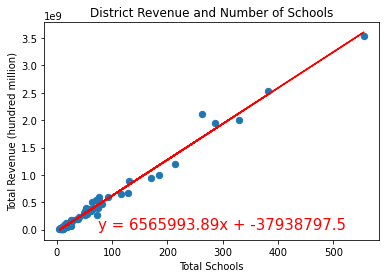

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for total schools and total revenue per district
correlation = sts.pearsonr(district_rev["Total Schools"],district_rev["Total Revenue"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = district_rev["Total Schools"]
y_values = district_rev["Total Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
district_rev.plot(kind="scatter", x="Total Schools", y="Total Revenue", s=40, figsize=(6,4),
                 title="District Revenue and Number of Schools")
plt.ylabel('Total Revenue (hundred million)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,1),fontsize=15,color="red")
plt.savefig('output/district_revenue_schools.png')
plt.show()

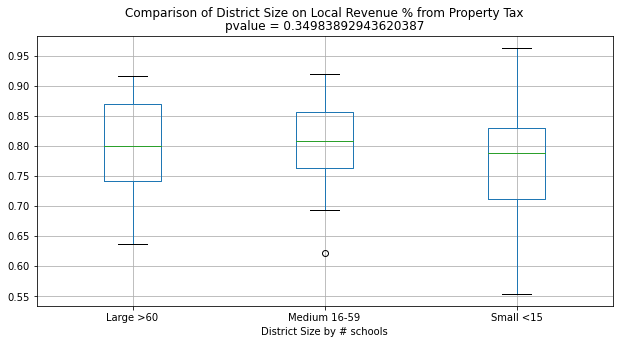

In [76]:
# Extract individual groups
prop_small = district_rev[district_rev["District Size by # schools"] == 'Small <15']["Revenue % from Property Tax"]
prop_medium = district_rev[district_rev["District Size by # schools"] == 'Medium 16-59']["Revenue % from Property Tax"]
prop_large = district_rev[district_rev["District Size by # schools"] == 'Large >60']["Revenue % from Property Tax"]
 
# Perform the ANOVA
prop_anova = sts.f_oneway(prop_small, prop_medium, prop_large)

district_rev.boxplot("Revenue % from Property Tax", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Local Revenue % from Property Tax')
plt.title(f'pvalue = {prop_anova[1]}')
plt.savefig('output/district_size_proptax.png')
plt.show()


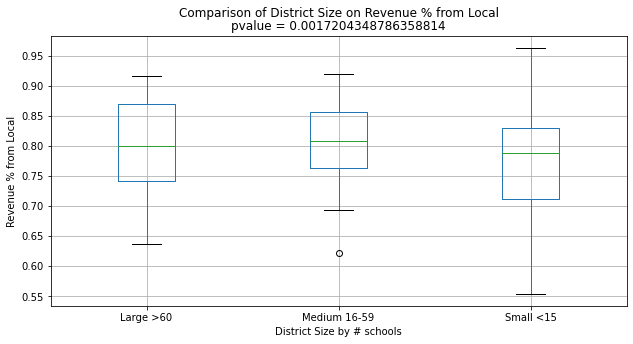

In [79]:
# Extract individual groups
local_small = district_rev[district_rev["District Size by # schools"] == "Small <15"]["Revenue % from Local"]
local_medium = district_rev[district_rev["District Size by # schools"] == "Medium 16-59"]["Revenue % from Local"]
local_large = district_rev[district_rev["District Size by # schools"] == "Large >60"]["Revenue % from Local"]

# Perform the ANOVA
loc_anova = sts.f_oneway(local_small, local_medium, local_large)

district_rev.boxplot("Revenue % from Property Tax", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Revenue % from Local')
plt.title(f'pvalue = {loc_anova[1]}')
plt.ylabel('Revenue % from Local')
plt.savefig('output/district_size_loc_rev.png')
plt.show()


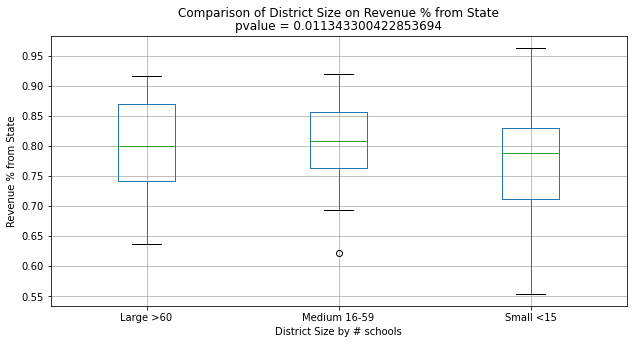

In [83]:
# Extract individual groups
state_small = district_rev[district_rev["District Size by # schools"] == "Small <15"]["Revenue % from State"]
state_medium = district_rev[district_rev["District Size by # schools"] == "Medium 16-59"]["Revenue % from State"]
state_large = district_rev[district_rev["District Size by # schools"] == "Large >60"]["Revenue % from State"]

# Perform the ANOVA
state_anova = sts.f_oneway(state_small, state_medium, state_large)

district_rev.boxplot("Revenue % from Property Tax", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Revenue % from State')
plt.title(f'pvalue = {state_anova[1]}')
plt.ylabel('Revenue % from State')
plt.savefig('output/district_size_state_rev.png')
plt.show()



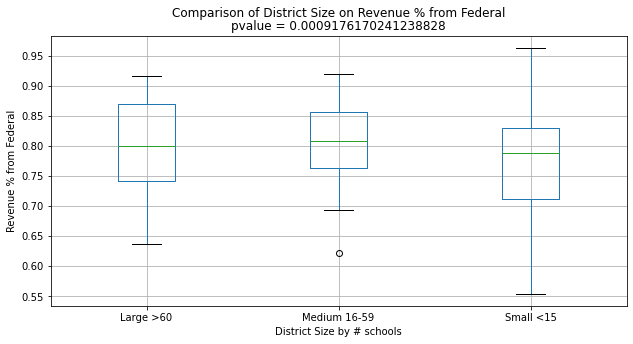

In [85]:
# Extract individual groups
federal_small = district_rev[district_rev["District Size by # schools"] == "Small <15"]["Revenue % from Federal"]
federal_medium = district_rev[district_rev["District Size by # schools"] == "Medium 16-59"]["Revenue % from Federal"]
federal_large = district_rev[district_rev["District Size by # schools"] == "Large >60"]["Revenue % from Federal"]

# Perform the ANOVA
fed_anova = sts.f_oneway(federal_small, federal_medium, federal_large)

district_rev.boxplot("Revenue % from Property Tax", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Revenue % from Federal')
plt.title(f'pvalue = {fed_anova[1]}')
plt.ylabel('Revenue % from Federal')
plt.savefig('output/district_size_fed_rev.png')
plt.show()



# Expense Analaysis

In [86]:
district_exp = districts_financials[["District Name","Total Dropout Rate", "Total Schools", "Total Students Enrolled", "Total FTE Teachers",
                                             "Total Expense","Instructional Total", "Total Expense for Instruction Staff", "Total Expense for General Admin", 
                                             "Total Expense for School Admin", "Total Expense for Operations",
                                             "Total Expense for Student Transportation", "District Size by # schools"]]


perc_instr = district_exp["Total Expense for Instruction Staff"] / district_exp["Total Expense"]
perc_gen_admin = district_exp["Total Expense for General Admin"]/district_exp["Total Expense"]
perc_sch_admin = district_exp["Total Expense for School Admin"]/district_exp["Total Expense"]
perc_oper = district_exp["Total Expense for Operations"]/district_exp["Total Expense"]
perc_trans = district_exp["Total Expense for Student Transportation"]/district_exp["Total Expense"]
per_school = district_exp["Total Expense"]/district_exp["Total Schools"]
per_student = district_exp["Instructional Total"]/district_exp["Total Students Enrolled"]
per_teacher = district_exp["Total Expense for Instruction Staff"]/district_exp["Total FTE Teachers"]


district_exp["Expense % for Instruction Staff"] = perc_instr
district_exp["Expense % for General Admin"] = perc_gen_admin
district_exp["Expense % for School Admin"] = perc_sch_admin
district_exp["Expense % for Operations"] = perc_oper
district_exp["Expense % for Transportation"] = perc_trans
district_exp["Expense per School"] = per_school
district_exp["Expense per Student"] = per_student
district_exp["Expense per Teacher"] = per_teacher


# # create a list of our conditions
# conditions = [
#     (district_exp["Total Schools"] <= 15),
#     (district_exp["Total Schools"] > 15) & (district_exp["Total Schools"] < 60),
#     (district_exp["Total Schools"] >= 60)
#     ]

# # create a list of the values we want to assign for each condition
# values = ['Small', 'Medium', 'Large']

# # create a new column and use np.select to assign values to it using our lists as arguments
# district_exp['District Size by # schools'] = np.select(conditions, values)


# Format columns
# distict_exp = distict_exp.style.format({"Total Expense": "${:,.0f}" , "Total Expense for Instruction Staff":"${:,.0f}",
#                                                             "Total Expense for General Admin":"${:,.0f}", "Total Expense for School Admin":"${:,.0f}",
#                                                             "Total Expense for Operations":"${:,.0f}", "Total Expense for Student Transportation":"${:,.0f}",
#                                                             "Expense % for Instruction Staff":"{:.2%}", "Expense % for General Admin":"{:.2%}",
#                                                             "Expense % for School Admin":"{:.2%}", "Expense % for Operations":"{:.2%}",
#                                                             "Expense % for Transportation":"{:.2%}" ,"Expense per School":"${:,.0f}",
#                                                             "Expense per Student":"${:,.0f}", "Expense per Teacher":"${:,.0f}"})

district_exp

<ipython-input-86-11207139b26c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_exp["Expense % for Instruction Staff"] = perc_instr
<ipython-input-86-11207139b26c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_exp["Expense % for General Admin"] = perc_gen_admin
<ipython-input-86-11207139b26c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,District Name,Total Dropout Rate,Total Schools,Total Students Enrolled,Total FTE Teachers,Total Expense,Instructional Total,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,...,Total Expense for Student Transportation,District Size by # schools,Expense % for Instruction Staff,Expense % for General Admin,Expense % for School Admin,Expense % for Operations,Expense % for Transportation,Expense per School,Expense per Student,Expense per Teacher
0,ALACHUA,0.028861,73,28689,1833,269955000,140998000,21763000,3041000,13128000,...,11174000,Large >60,0.080617,0.011265,0.048630,0.109407,0.041392,3.698014e+06,4914.705985,11872.885979
1,BAKER,0.009673,9,4936,301,44360000,23242000,2595000,732000,2007000,...,2613000,Small <15,0.058499,0.016501,0.045243,0.098850,0.058904,4.928889e+06,4708.670989,8621.262458
2,BAY,0.011826,51,27641,1844,278559000,149034000,11183000,2045000,13550000,...,8132000,Medium 16-59,0.040146,0.007341,0.048643,0.073834,0.029193,5.461941e+06,5391.773091,6064.533623
3,BRADFORD,0.006283,12,3199,242,31823000,17274000,1490000,734000,1792000,...,1629000,Small <15,0.046821,0.023065,0.056311,0.100462,0.051189,2.651917e+06,5399.812441,6157.024793
4,BREVARD,0.008279,129,72285,4776,652911000,371080000,49626000,5282000,36220000,...,17750000,Large >60,0.076007,0.008090,0.055475,0.085273,0.027186,5.061326e+06,5133.568514,10390.703518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,UNION,0.008097,9,2384,175,21413000,12606000,1348000,674000,853000,...,706000,Small <15,0.062952,0.031476,0.039836,0.097277,0.032971,2.379222e+06,5287.751678,7702.857143
62,VOLUSIA,0.009916,92,61777,4153,576168000,322156000,37538000,4455000,36135000,...,16515000,Large >60,0.065151,0.007732,0.062716,0.087525,0.028664,6.262696e+06,5214.821050,9038.767156
63,WAKULLA,0.012262,15,5141,327,45316000,23258000,1768000,1243000,2650000,...,2823000,Small <15,0.039015,0.027430,0.058478,0.119251,0.062296,3.021067e+06,4524.022564,5406.727829
64,WALTON,0.022425,23,8435,569,99938000,44806000,5280000,1007000,5026000,...,4787000,Medium 16-59,0.052833,0.010076,0.050291,0.098961,0.047900,4.345130e+06,5311.914641,9279.437610


In [87]:
district_exp["Expense per Student"].describe()

count      66.000000
mean     5300.779440
std       505.407666
min      4524.022564
25%      5010.868271
50%      5182.227476
75%      5468.906477
max      7287.685775
Name: Expense per Student, dtype: float64

The correlation between both factors is 0.99


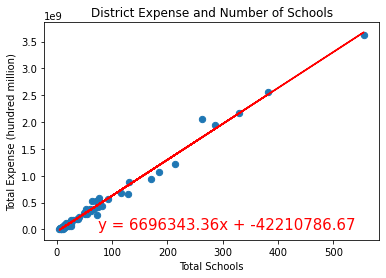

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for total schools and total expense per district
correlation = sts.pearsonr(district_rev["Total Schools"],district_exp["Total Expense"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = district_exp["Total Schools"]
y_values = district_exp["Total Expense"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
district_exp.plot(kind="scatter", x="Total Schools", y="Total Expense", s=40, figsize=(6,4),
                 title="District Expense and Number of Schools")
plt.ylabel('Total Expense (hundred million)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,1),fontsize=15,color="red")
plt.savefig('output/district_expense_schools.png')
plt.show()

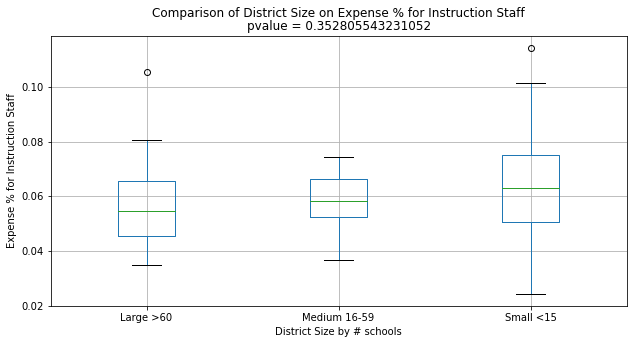

In [90]:
# Extract individual groups
staff_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense % for Instruction Staff"]
staff_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense % for Instruction Staff"]
staff_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense % for Instruction Staff"]

# Perform the ANOVA
ins_staff_anova = sts.f_oneway(staff_small, staff_medium, staff_large)

district_exp.boxplot("Expense % for Instruction Staff", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Expense % for Instruction Staff')
plt.title(f'pvalue = {ins_staff_anova[1]}')
plt.ylabel('Expense % for Instruction Staff')
plt.savefig('output/district_size_inst_staff_exp.png')
plt.show()



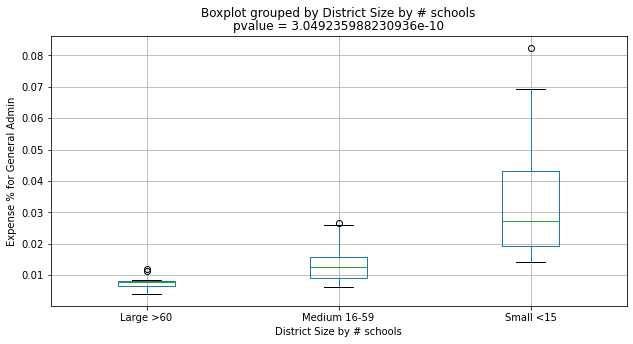

In [92]:
# Extract individual groups
gadmin_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense % for General Admin"]
gadmin_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense % for General Admin"]
gadmin_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense % for General Admin"]

# Perform the ANOVA
gen_adm_staff_anova = sts.f_oneway(gadmin_small, gadmin_medium, gadmin_large)

district_exp.boxplot("Expense % for General Admin", by="District Size by # schools", figsize=(10, 5))
plt.title('Comparison of District Size on Expense % for General Admin')
plt.title(f'pvalue = {gen_adm_staff_anova[1]}')
plt.ylabel('Expense % for General Admin')
plt.savefig('output/district_size_gen_adm_staff_exp.png')
plt.show()



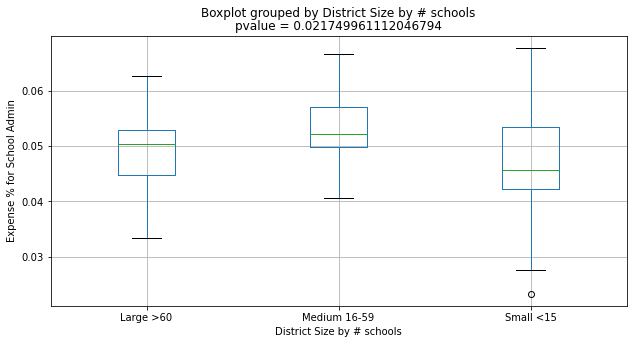

In [94]:
# Extract individual groups
scadmin_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense % for School Admin"]
scadmin_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense % for School Admin"]
scadmin_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense % for School Admin"]

# Perform the ANOVA
sch_adm_staff_anova = sts.f_oneway(scadmin_small, scadmin_medium, scadmin_large)

district_exp.boxplot("Expense % for School Admin", by="District Size by # schools", figsize=(10, 5))
plt.title('Comparison of District Size on Expense % for School Admin')
plt.title(f'pvalue = {sch_adm_staff_anova[1]}')
plt.ylabel('Expense % for School Admin')
plt.savefig('output/district_size_sch_adm_staff_exp.png')
plt.show()



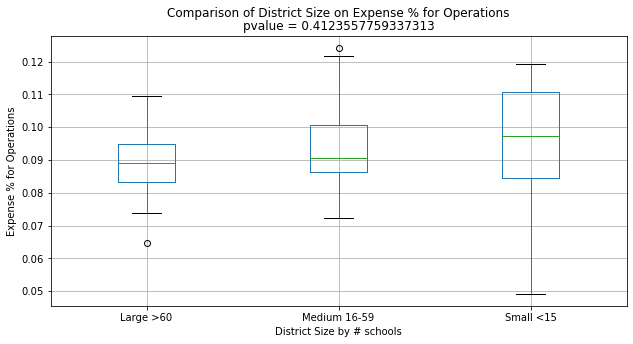

In [96]:
# Extract individual groups
operations_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense % for Operations"]
operations_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense % for Operations"]
operations_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense % for Operations"]

# Perform the ANOVA
operations_anova = sts.f_oneway(operations_small, operations_medium, operations_large)

district_exp.boxplot("Expense % for Operations", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Expense % for Operations')
plt.title(f'pvalue = {operations_anova[1]}')
plt.ylabel('Expense % for Operations')
plt.savefig('output/district_size_operations_exp.png')
plt.show()



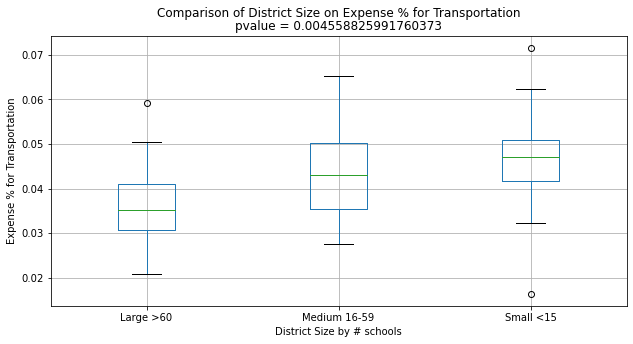

In [98]:
# Extract individual groups
transport_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense % for Transportation"]
transport_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense % for Transportation"]
transport_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense % for Transportation"]

# Perform the ANOVA
transportation_anova = sts.f_oneway(transport_small, transport_medium, transport_large)

district_exp.boxplot("Expense % for Transportation", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Expense % for Transportation')
plt.title(f'pvalue = {transportation_anova[1]}')
plt.ylabel('Expense % for Transportation')
plt.savefig('output/district_size_transportation_exp.png')
plt.show()



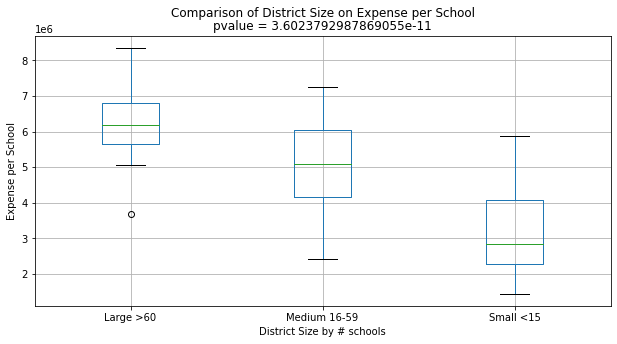

In [100]:
# Extract individual groups
per_sch_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense per School"]
per_sch_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense per School"]
per_sch_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense per School"]

# Perform the ANOVA
per_sch_anova = sts.f_oneway(per_sch_small, per_sch_medium, per_sch_large)

district_exp.boxplot("Expense per School", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Expense per School')
plt.title(f'pvalue = {per_sch_anova[1]}')
plt.ylabel('Expense per School')
plt.savefig('output/district_size_per_school_exp.png')
plt.show()



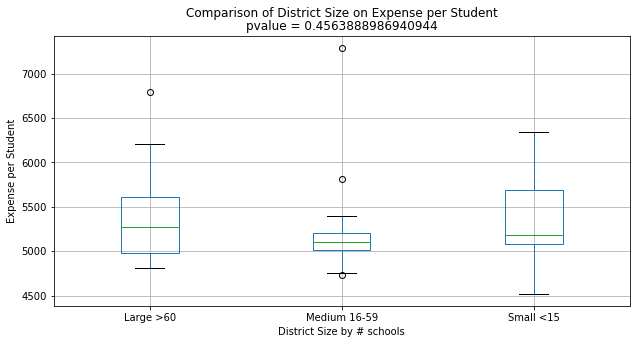

In [102]:
# Extract individual groups
per_stu_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense per Student"]
per_stu_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense per Student"]
per_stu_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense per Student"]

# Perform the ANOVA
per_student_anova = sts.f_oneway(per_stu_small, per_stu_medium, per_stu_large)

district_exp.boxplot("Expense per Student", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Expense per Student')
plt.title(f'pvalue = {per_student_anova[1]}')
plt.ylabel('Expense per Student')
plt.savefig('output/district_size_per_student_exp.png')
plt.show()



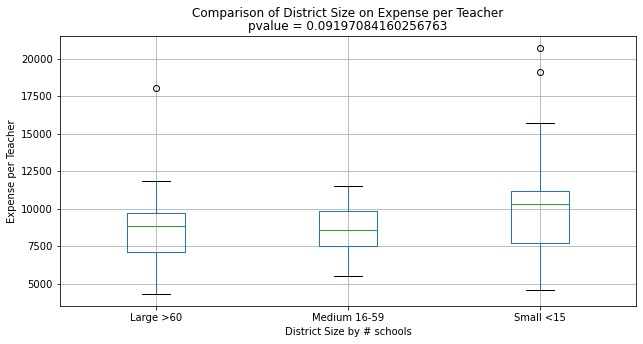

In [104]:
# Extract individual groups
per_teacher_small = district_exp[district_exp["District Size by # schools"] == "Small <15"]["Expense per Teacher"]
per_teacher_medium = district_exp[district_exp["District Size by # schools"] == "Medium 16-59"]["Expense per Teacher"]
per_teacher_large = district_exp[district_exp["District Size by # schools"] == "Large >60"]["Expense per Teacher"]

# Perform the ANOVA
per_teacher_anova = sts.f_oneway(per_teacher_small, per_teacher_medium, per_teacher_large)

district_exp.boxplot("Expense per Teacher", by="District Size by # schools", figsize=(10, 5))
plt.suptitle('Comparison of District Size on Expense per Teacher')
plt.title(f'pvalue = {per_teacher_anova[1]}')
plt.ylabel('Expense per Teacher')
plt.savefig('output/district_size_per_teacher_exp.png')
plt.show()


In [114]:
# Establish an even distribution of districts based on number of schools
st_5000 = district_exp.loc[(district_exp["Expense per Student"] <= 5000)]
st_6000 = district_exp.loc[(district_exp["Expense per Student"] > 5000) & (district_exp["Expense per Student"] < 6000)]
st_7000 = district_exp.loc[district_exp["Expense per Student"] >= 6000]
print(f'Smaller Districts = {st_5000["Expense per Student"].count()}, Medium Districts = {st_6000["Expense per Student"].count()}, Large Districts = {st_7000["Expense per Student"].count()}')

Smaller Districts = 16, Medium Districts = 43, Large Districts = 7


In [109]:
student_cost = district_exp[["District Name","Total Dropout Rate", "Total Students Enrolled",
                                             "Total Expense","Instructional Total", "Expense per Student"
                                             ]]


# create a list of our conditions
conditions = [
    (student_cost["Expense per Student"] <= 5000),
    (student_cost["Expense per Student"] > 5000) & (student_cost["Expense per Student"] < 6000),
    (student_cost["Expense per Student"] >= 6000)
    ]

# create a list of the values we want to assign for each condition
values = ['< $5000', "$5000-$5999", '> $6000']

# create a new column and use np.select to assign values to it using our lists as arguments
student_cost['Student Expense Range'] = np.select(conditions, values)


# Format columns
# distict_exp = distict_exp.style.format({"Total Expense": "${:,.0f}" , "Total Expense for Instruction Staff":"${:,.0f}",
#                                                             "Total Expense for General Admin":"${:,.0f}", "Total Expense for School Admin":"${:,.0f}",
#                                                             "Total Expense for Operations":"${:,.0f}", "Total Expense for Student Transportation":"${:,.0f}",
#                                                             "Expense % for Instruction Staff":"{:.2%}", "Expense % for General Admin":"{:.2%}",
#                                                             "Expense % for School Admin":"{:.2%}", "Expense % for Operations":"{:.2%}",
#                                                             "Expense % for Transportation":"{:.2%}" ,"Expense per School":"${:,.0f}",
#                                                             "Expense per Student":"${:,.0f}", "Expense per Teacher":"${:,.0f}"})

student_cost

<ipython-input-109-0ec52c252006>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_cost['Student Expense Range'] = np.select(conditions, values)


,District Name,Total Dropout Rate,Total Students Enrolled,Total Expense,Instructional Total,Expense per Student,Student Expense Range
0,ALACHUA,0.028861,28689,269955000,140998000,4914.705985,< $5000
1,BAKER,0.009673,4936,44360000,23242000,4708.670989,< $5000
2,BAY,0.011826,27641,278559000,149034000,5391.773091,$5000-$5999
3,BRADFORD,0.006283,3199,31823000,17274000,5399.812441,$5000-$5999
4,BREVARD,0.008279,72285,652911000,371080000,5133.568514,$5000-$5999
...,...,...,...,...,...,...,...
61,UNION,0.008097,2384,21413000,12606000,5287.751678,$5000-$5999
62,VOLUSIA,0.009916,61777,576168000,322156000,5214.821050,$5000-$5999
63,WAKULLA,0.012262,5141,45316000,23258000,4524.022564,< $5000
64,WALTON,0.022425,8435,99938000,44806000,5311.914641,$5000-$5999


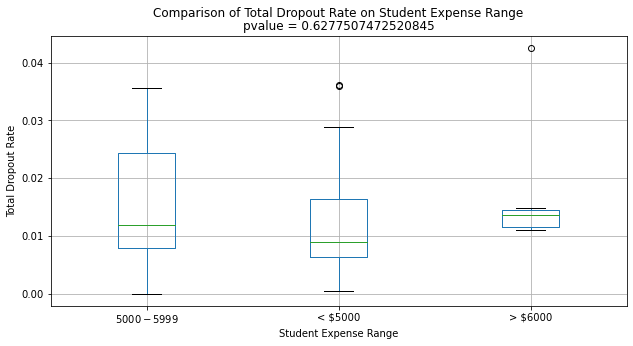

In [115]:
# Extract individual groups
student_low = student_cost[student_cost["Student Expense Range"] == "< $5000"]["Total Dropout Rate"]
student_medium = student_cost[student_cost["Student Expense Range"] == "$5000-$5999"]["Total Dropout Rate"]
student_large = student_cost[student_cost["Student Expense Range"] == "> $6000"]["Total Dropout Rate"]

# Perform the ANOVA
stu_exp_range = sts.f_oneway(student_low, student_medium, student_large)

student_cost.boxplot("Total Dropout Rate", by="Student Expense Range", figsize=(10, 5))
plt.suptitle('Comparison of Total Dropout Rate on Student Expense Range')
plt.title(f'pvalue = {stu_exp_range[1]}')
plt.ylabel('Total Dropout Rate')
plt.savefig('output/student_exp_range.png')
plt.show()



In [107]:
student_cost.describe()

,Total Dropout Rate,Total Students Enrolled,Total Expense,Instructional Total,Expense per Student
count,66.000000,66.000000,6.600000e+01,6.600000e+01,66.000000
mean,0.015415,41498.393939,4.125318e+08,2.258507e+08,5300.779440
std,0.010723,66680.760408,6.747438e+08,3.754067e+08,505.407666
min,0.000000,888.000000,1.112700e+07,5.084000e+06,4524.022564
25%,0.007852,4987.250000,4.568750e+07,2.324600e+07,5010.868271
50%,0.011526,13959.500000,1.339345e+08,7.071100e+07,5182.227476
75%,0.022460,42425.750000,4.369120e+08,2.407968e+08,5468.906477
max,0.042532,356964.000000,3.624404e+09,2.036774e+09,7287.685775


In [139]:
# dist_above_exp = districts_above_financials[["District Name","Total Schools", "Total Students Enrolled", "Total FTE Teachers",
#                                              "Total Expense", "Total Expense for Instruction Staff", "Total Expense for General Admin", 
#                                              "Total Expense for School Admin", "Total Expense for Operations",
#                                              "Total Expense for Student Transportation"]]


# above_perc_instr = dist_above_exp["Total Expense for Instruction Staff"] / dist_above_exp["Total Expense"]
# above_perc_gen_admin = dist_above_exp["Total Expense for General Admin"]/dist_above_exp["Total Expense"]
# above_perc_sch_admin = dist_above_exp["Total Expense for School Admin"]/dist_above_exp["Total Expense"]
# above_perc_oper = dist_above_exp["Total Expense for Operations"]/dist_above_exp["Total Expense"]
# above_perc_trans = dist_above_exp["Total Expense for Student Transportation"]/dist_above_exp["Total Expense"]
# above_per_school = dist_above_exp["Total Expense"]/dist_above_exp["Total Schools"]
# above_per_student = dist_above_exp["Total Expense"]/dist_above_exp["Total Students Enrolled"]
# above_per_teacher = dist_above_exp["Total Expense"]/dist_above_exp["Total FTE Teachers"]


# dist_above_exp["Expense % for Instruction Staff"] = above_perc_instr
# dist_above_exp["Expense % for General Admin"] = above_perc_gen_admin
# dist_above_exp["Expense % for School Admin"] = above_perc_sch_admin
# dist_above_exp["Expense % for Operations"] = above_perc_oper
# dist_above_exp["Expense % for Transportation"] = above_perc_trans
# dist_above_exp["Expense per School"] = above_per_school
# dist_above_exp["Expense per Student"] = above_per_student
# dist_above_exp["Expense per Teacher"] = above_per_teacher


# # Format columns
# dist_above_exp = dist_above_exp.style.format({"Total Expense": "${:,.0f}" , "Total Expense for Instruction Staff":"${:,.0f}",
#                                                             "Total Expense for General Admin":"${:,.0f}", "Total Expense for School Admin":"${:,.0f}",
#                                                             "Total Expense for Operations":"${:,.0f}", "Total Expense for Student Transportation":"${:,.0f}",
#                                                             "Expense % for Instruction Staff":"{:.2%}", "Expense % for General Admin":"{:.2%}",
#                                                             "Expense % for School Admin":"{:.2%}", "Expense % for Operations":"{:.2%}",
#                                                             "Expense % for Transportation":"{:.2%}" ,"Expense per School":"${:,.0f}",
#                                                             "Expense per Student":"${:,.0f}", "Expense per Teacher":"${:,.0f}"})

# dist_above_exp

In [140]:
# dist_below_exp = districts_below_financials[["District Name","Total Schools", "Total Students Enrolled", "Total FTE Teachers", 
#                                              "Total Expense","Total Expense for Instruction Staff", "Total Expense for General Admin", 
#                                              "Total Expense for School Admin", "Total Expense for Operations",
#                                              "Total Expense for Student Transportation"]]


# below_perc_instr = dist_below_exp["Total Expense for Instruction Staff"] / dist_below_exp["Total Expense"]
# below_perc_gen_admin = dist_below_exp["Total Expense for General Admin"]/dist_below_exp["Total Expense"]
# below_perc_sch_admin = dist_below_exp["Total Expense for School Admin"]/dist_below_exp["Total Expense"]
# below_perc_oper = dist_below_exp["Total Expense for Operations"]/dist_below_exp["Total Expense"]
# below_perc_trans = dist_below_exp["Total Expense for Student Transportation"]/dist_below_exp["Total Expense"]
# below_per_school = dist_below_exp["Total Expense"]/dist_below_exp["Total Schools"]
# below_per_student = dist_below_exp["Total Expense"]/dist_below_exp["Total Students Enrolled"]
# below_per_teacher = dist_below_exp["Total Expense"]/dist_below_exp["Total FTE Teachers"]


# dist_below_exp["Expense % for Instruction Staff"] = below_perc_instr
# dist_below_exp["Expense % for General Admin"] = below_perc_gen_admin
# dist_below_exp["Expense % for School Admin"] = below_perc_sch_admin
# dist_below_exp["Expense % for Operations"] = below_perc_oper
# dist_below_exp["Expense % for Transportation"] = below_perc_trans
# dist_below_exp["Expense per School"] = below_per_school
# dist_below_exp["Expense per Student"] = below_per_student
# dist_below_exp["Expense per Teacher"] = below_per_teacher

# # Format columns
# dist_below_exp = dist_below_exp.style.format({"Total Expense": "${:,.0f}" , "Total Expense for Instruction Staff":"${:,.0f}",
#                                                             "Total Expense for General Admin":"${:,.0f}", "Total Expense for School Admin":"${:,.0f}",
#                                                             "Total Expense for Operations":"${:,.0f}", "Total Expense for Student Transportation":"${:,.0f}",
#                                                             "Expense % for Instruction Staff":"{:.2%}", "Expense % for General Admin":"{:.2%}",
#                                                             "Expense % for School Admin":"{:.2%}", "Expense % for Operations":"{:.2%}",
#                                                             "Expense % for Transportation":"{:.2%}" ,"Expense per School":"${:,.0f}",
#                                                             "Expense per Student":"${:,.0f}", "Expense per Teacher":"${:,.0f}"})

# dist_below_exp

In [81]:
low_sample = low["Total Dropout Rate"]
medium_sample = medium["Total Dropout Rate"]
high_sample = high["Total Dropout Rate"]
population = districts_financials["Total Dropout Rate"]

In [82]:
sts.ttest_1samp(low_sample, population.mean())

Ttest_1sampResult(statistic=-0.5028716816033644, pvalue=0.6208337376866064)

In [83]:
sts.ttest_1samp(medium_sample, population.mean())

Ttest_1sampResult(statistic=0.4616986560526379, pvalue=0.6488302574833695)

In [84]:
sts.ttest_1samp(high_sample, population.mean())

Ttest_1sampResult(statistic=0.06268180871566162, pvalue=0.9506126728880958)

In [86]:
sts.ttest_ind(low_sample, medium_sample, equal_var=False)

Ttest_indResult(statistic=-0.6825996892829069, pvalue=0.49876228555729707)

In [87]:
sts.ttest_ind(low_sample, high_sample, equal_var=False)

Ttest_indResult(statistic=-0.4082099971228103, pvalue=0.6853201513719618)

In [88]:
sts.ttest_ind(medium_sample, high_sample, equal_var=False)

Ttest_indResult(statistic=0.28191650731015183, pvalue=0.7793607558730908)